In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import scipy.cluster.hierarchy as sch
from sklearn.cluster import AgglomerativeClustering

In [ ]:
from google.colab import files
uploaded=files.upload()

Saving EastWestAirlines.xlsx to EastWestAirlines.xlsx


In [ ]:
data=pd.read_excel('EastWestAirlines.xlsx',sheet_name='data')
data.head()

,ID#,Balance,Qual_miles,cc1_miles,cc2_miles,cc3_miles,Bonus_miles,Bonus_trans,Flight_miles_12mo,Flight_trans_12,Days_since_enroll,Award?
0,1,28143,0,1,1,1,174,1,0,0,7000,0
1,2,19244,0,1,1,1,215,2,0,0,6968,0
2,3,41354,0,1,1,1,4123,4,0,0,7034,0
3,4,14776,0,1,1,1,500,1,0,0,6952,0
4,5,97752,0,4,1,1,43300,26,2077,4,6935,1


#EDA

In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3999 entries, 0 to 3998
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype
---  ------             --------------  -----
 0   ID#                3999 non-null   int64
 1   Balance            3999 non-null   int64
 2   Qual_miles         3999 non-null   int64
 3   cc1_miles          3999 non-null   int64
 4   cc2_miles          3999 non-null   int64
 5   cc3_miles          3999 non-null   int64
 6   Bonus_miles        3999 non-null   int64
 7   Bonus_trans        3999 non-null   int64
 8   Flight_miles_12mo  3999 non-null   int64
 9   Flight_trans_12    3999 non-null   int64
 10  Days_since_enroll  3999 non-null   int64
 11  Award?             3999 non-null   int64
dtypes: int64(12)
memory usage: 375.0 KB


In [ ]:
data.columns

Index(['ID#', 'Balance', 'Qual_miles', 'cc1_miles', 'cc2_miles', 'cc3_miles',
       'Bonus_miles', 'Bonus_trans', 'Flight_miles_12mo', 'Flight_trans_12',
       'Days_since_enroll', 'Award?'],
      dtype='object')

In [ ]:
data=data.rename({'ID#':'ID','Award?':'Award'},axis=1)
data.head()

,ID,Balance,Qual_miles,cc1_miles,cc2_miles,cc3_miles,Bonus_miles,Bonus_trans,Flight_miles_12mo,Flight_trans_12,Days_since_enroll,Award,clustersid_s1,clustersid_s2,clusterid_Kmeans
0,1,28143,0,1,1,1,174,1,0,0,7000,0,1,1,1
1,2,19244,0,1,1,1,215,2,0,0,6968,0,1,1,1
2,3,41354,0,1,1,1,4123,4,0,0,7034,0,1,1,1
3,4,14776,0,1,1,1,500,1,0,0,6952,0,1,1,1
4,5,97752,0,4,1,1,43300,26,2077,4,6935,1,0,0,2


In [ ]:
data.isnull().sum()

ID                   0
Balance              0
Qual_miles           0
cc1_miles            0
cc2_miles            0
cc3_miles            0
Bonus_miles          0
Bonus_trans          0
Flight_miles_12mo    0
Flight_trans_12      0
Days_since_enroll    0
Award                0
clustersid_s1        0
clustersid_s2        0
clusterid_Kmeans     0
dtype: int64

In [ ]:
data.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
ID,3999.0,2014.819455,1160.764358,1.0,1010.5,2016.0,3020.5,4021.0
Balance,3999.0,73601.327582,100775.664958,0.0,18527.5,43097.0,92404.0,1704838.0
Qual_miles,3999.0,144.114529,773.663804,0.0,0.0,0.0,0.0,11148.0
cc1_miles,3999.0,2.059515,1.376919,1.0,1.0,1.0,3.0,5.0
cc2_miles,3999.0,1.014504,0.147650,1.0,1.0,1.0,1.0,3.0
cc3_miles,3999.0,1.012253,0.195241,1.0,1.0,1.0,1.0,5.0
Bonus_miles,3999.0,17144.846212,24150.967826,0.0,1250.0,7171.0,23800.5,263685.0
Bonus_trans,3999.0,11.601900,9.603810,0.0,3.0,12.0,17.0,86.0
Flight_miles_12mo,3999.0,460.055764,1400.209171,0.0,0.0,0.0,311.0,30817.0
Flight_trans_12,3999.0,1.373593,3.793172,0.0,0.0,0.0,1.0,53.0


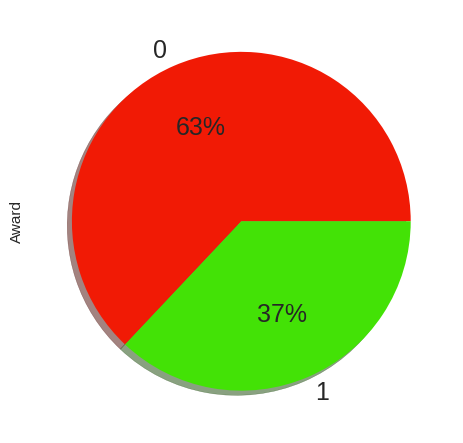

In [ ]:
# Checking previously awarded miles ratio
data['Award'].value_counts().plot(kind='pie', autopct='%2.0f%%', fontsize='18',
                                        colors = ['#F11A05','#43E206'], shadow =True)
plt.show()

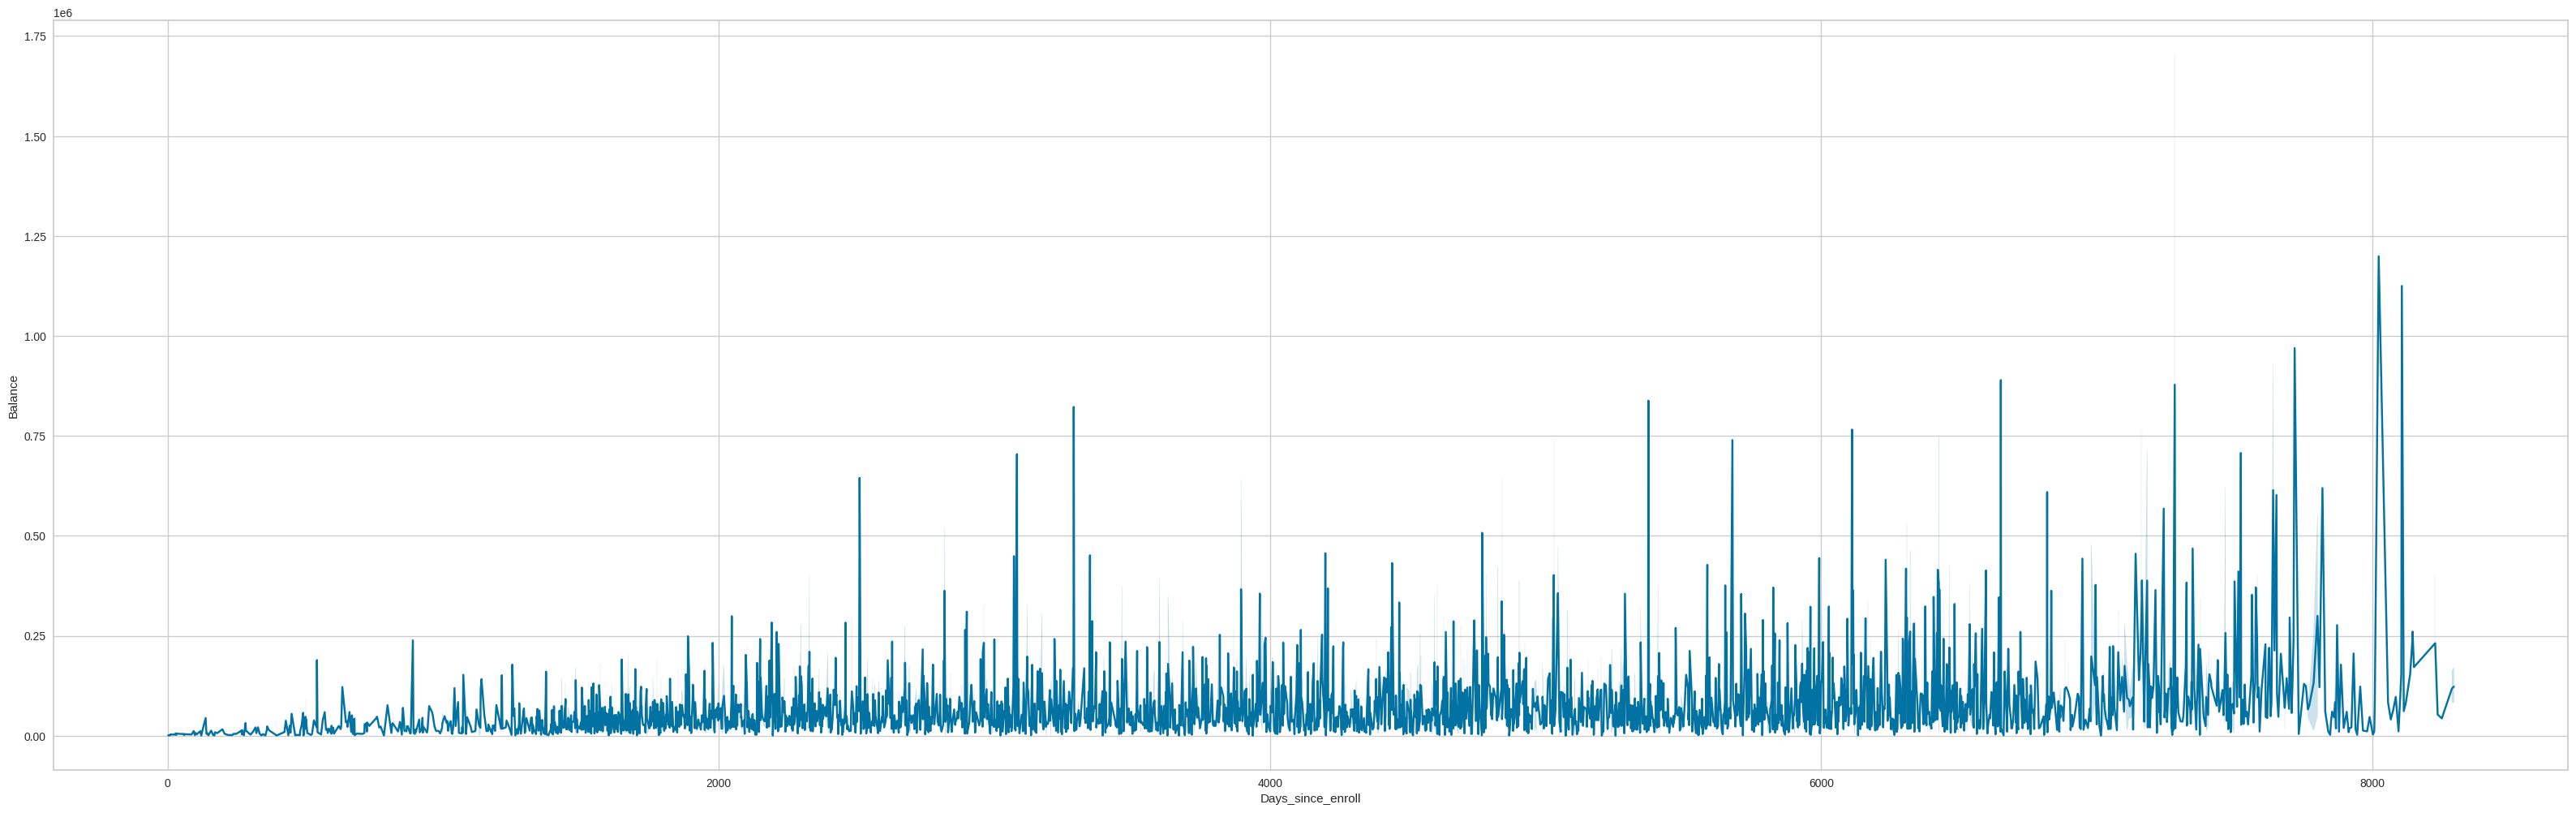

In [ ]:
# Checking relation between Balance and Days_since_enroll
import seaborn as sns
fig, ax =plt.subplots(figsize=(40,12))
ax = sns.lineplot(x= 'Days_since_enroll', y='Balance',data = data)

#Agglomerative Clustering

In [ ]:
data1 = data.drop('ID', axis = 1)
data1.head()

,Balance,Qual_miles,cc1_miles,cc2_miles,cc3_miles,Bonus_miles,Bonus_trans,Flight_miles_12mo,Flight_trans_12,Days_since_enroll,Award,clustersid_s1,clustersid_s2,clusterid_Kmeans
0,28143,0,1,1,1,174,1,0,0,7000,0,2,1,1
1,19244,0,1,1,1,215,2,0,0,6968,0,2,1,1
2,41354,0,1,1,1,4123,4,0,0,7034,0,2,1,1
3,14776,0,1,1,1,500,1,0,0,6952,0,2,1,1
4,97752,0,4,1,1,43300,26,2077,4,6935,1,0,0,2


In [ ]:
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler

In [ ]:
# We will check clustering for two different scaling functions
scaler1 = MinMaxScaler()
scaler2 = StandardScaler()

In [ ]:
# Normalizing Dataset
scaler1_df = scaler1.fit_transform(data1)
print(scaler1_df)

print('\n')

scaler2_df = scaler2.fit_transform(data1)
print(scaler2_df)

[[0.01650773 0.         0.         ... 0.5        0.25       0.25      ]
 [0.01128788 0.         0.         ... 0.5        0.25       0.25      ]
 [0.02425685 0.         0.         ... 0.5        0.25       0.25      ]
 ...
 [0.0431695  0.         0.5        ... 0.         0.         0.5       ]
 [0.03220189 0.         0.         ... 1.         0.25       1.        ]
 [0.00176908 0.         0.         ... 1.         0.25       1.        ]]


[[-4.51140783e-01 -1.86298687e-01 -7.69578406e-01 ... -7.46682236e-02
   4.41786398e-01 -7.72856133e-01]
 [-5.39456874e-01 -1.86298687e-01 -7.69578406e-01 ... -7.46682236e-02
   4.41786398e-01 -7.72856133e-01]
 [-3.20031232e-01 -1.86298687e-01 -7.69578406e-01 ... -7.46682236e-02
   4.41786398e-01 -7.72856133e-01]
 ...
 [-4.29480975e-05 -1.86298687e-01  6.83121167e-01 ... -1.44125049e+00
  -1.17607423e+00 -7.89514011e-02]
 [-1.85606976e-01 -1.86298687e-01 -7.69578406e-01 ...  1.29191405e+00
   4.41786398e-01  1.30885806e+00]
 [-7.00507951e-01 -1.862

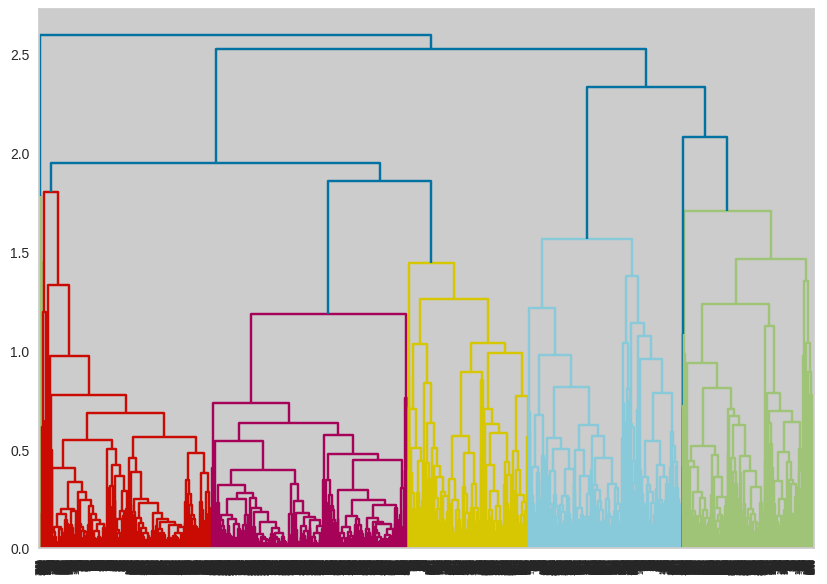

In [ ]:
# Create Dendrograms
plt.figure(figsize=(10, 7))
dendograms=sch.dendrogram(sch.linkage(scaler1_df,'complete'))

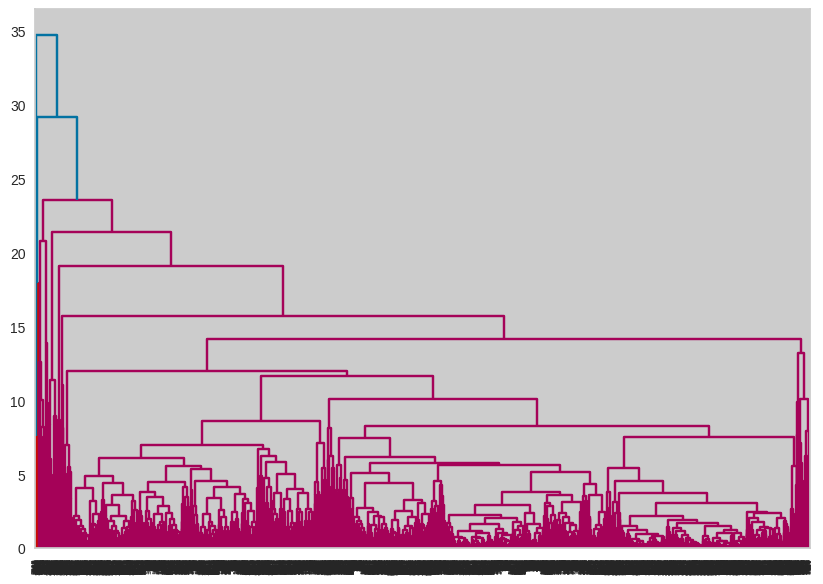

In [ ]:
plt.figure(figsize=(10, 7))
dendograms=sch.dendrogram(sch.linkage(scaler2_df,'complete'))

In [ ]:
# Creating clusters
H_clusters=AgglomerativeClustering(n_clusters=5,affinity='euclidean',linkage='ward')
H_clusters

AgglomerativeClustering(affinity='euclidean', n_clusters=5)

In [ ]:
# Using data normalized by MinMaxScaler
y=pd.DataFrame(H_clusters.fit_predict(scaler1_df),columns=['clustersid'])
y['clustersid'].value_counts()

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_agglomerative.py:983: FutureWarning: Attribute `affinity` was deprecated in version 1.2 and will be removed in 1.4. Use `metric` instead
  warnings.warn(


2    1012
0     895
1     793
3     679
4     620
Name: clustersid, dtype: int64

In [ ]:
# Adding clusters to dataset
# 1. cluster id with scaler_1 i.e. minmaxscaler
data['clustersid_s1']=H_clusters.labels_
data

data1['clustersid_s1']=H_clusters.labels_

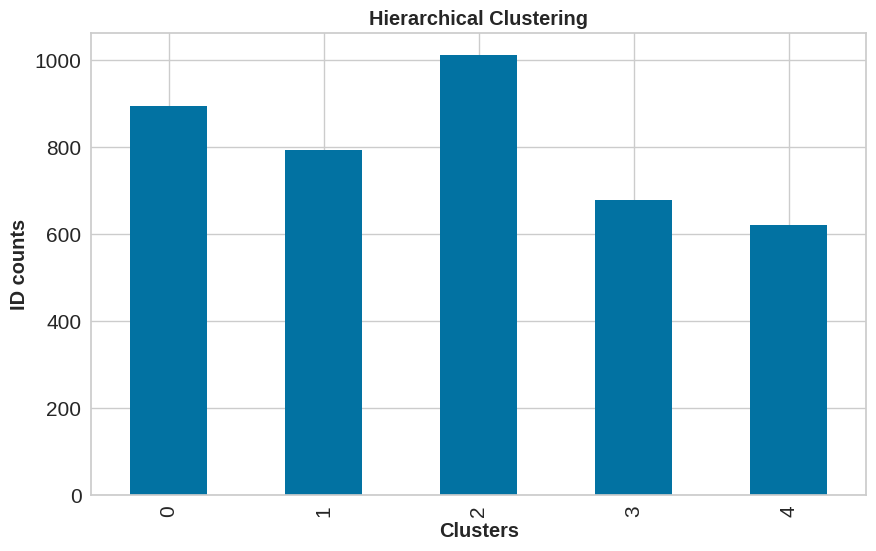

In [ ]:
# Plotting barplot using groupby method to get visualization of how many row no. in each cluster

fig, ax = plt.subplots(figsize=(10, 6))
data.groupby(['clustersid_s1']).count()['ID'].plot(kind='bar')
plt.ylabel('ID Counts')
plt.title('Hierarchical Clustering',fontsize='large',fontweight='bold')
ax.set_xlabel('Clusters', fontsize='large', fontweight='bold')
ax.set_ylabel('ID counts', fontsize='large', fontweight='bold')
plt.yticks(fontsize=15)
plt.xticks(fontsize=15)
plt.show()

In [ ]:
data1.groupby('clustersid_s1').agg(['mean']).reset_index()

,clustersid_s1,Balance,Qual_miles,cc1_miles,cc2_miles,cc3_miles,Bonus_miles,Bonus_trans,Flight_miles_12mo,Flight_trans_12,Days_since_enroll,Award,clustersid_s2,clusterid_Kmeans
,,mean,mean,mean,mean,mean,mean,mean,mean,mean,mean,mean,mean,mean
0,0,51125.374302,77.089385,1.163128,1.037989,1.054749,5194.781006,7.357542,245.416760,0.736313,5497.973184,0.010056,1.108380,1.055866
1,1,108060.611602,198.945776,3.915511,1.000000,1.000000,44966.092055,19.889029,630.728878,1.925599,4865.522068,1.000000,0.108449,2.000000
2,2,32918.780632,89.644269,1.067194,1.000000,1.000000,2965.573123,5.958498,213.351779,0.600791,1988.869565,0.000000,0.996047,4.000000
3,3,84483.824742,289.815906,1.181149,1.033873,1.000000,9045.169367,10.807069,1126.643594,3.397644,4342.237113,1.000000,0.901325,0.005891
4,4,116458.243548,100.080645,3.561290,1.001613,1.000000,30825.758065,17.211290,224.264516,0.632258,4403.159677,0.000000,0.337097,3.016129


In [ ]:
from sklearn.metrics import silhouette_score

In [ ]:
sil_score= silhouette_score(scaler1_df, H_clusters.labels_)
sil_score

0.6412959814329393

In [ ]:
# Using data normalized by StandardScaler
y=pd.DataFrame(H_clusters.fit_predict(scaler2_df),columns=['clustersid'])
y['clustersid'].value_counts()

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_agglomerative.py:983: FutureWarning: Attribute `affinity` was deprecated in version 1.2 and will be removed in 1.4. Use `metric` instead
  warnings.warn(


1    1479
2    1351
3     992
4     116
0      61
Name: clustersid, dtype: int64

In [ ]:
# Adding clusters to dataset
# 1. cluster id with scaler_1 i.e. StandardScaler
data['clustersid_s2']=H_clusters.labels_
data1['clustersid_s2']=H_clusters.labels_

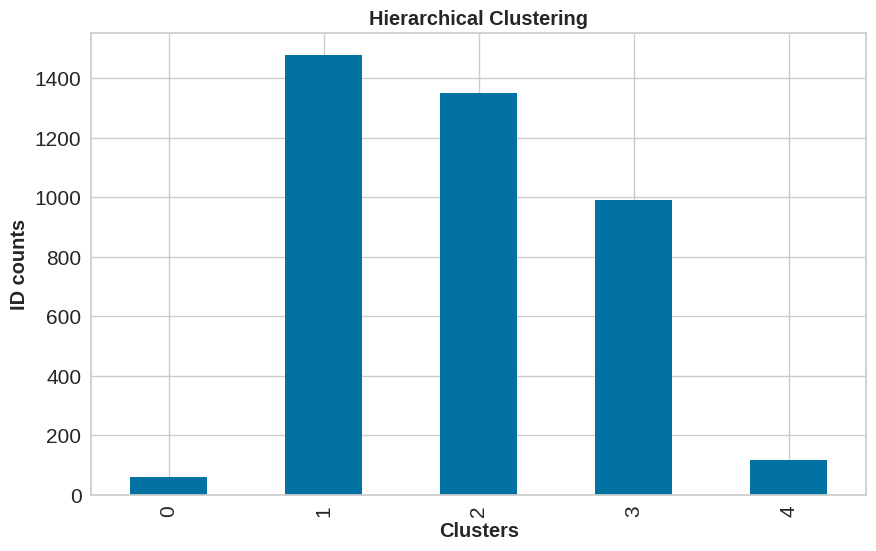

In [ ]:
# Plotting barplot using groupby method to get visualization of how many row no. in each cluster
fig, ax = plt.subplots(figsize=(10, 6))
data.groupby(['clustersid_s2']).count()['ID'].plot(kind='bar')
plt.ylabel('ID Counts')
plt.title('Hierarchical Clustering',fontsize='large',fontweight='bold')
ax.set_xlabel('Clusters', fontsize='large', fontweight='bold')
ax.set_ylabel('ID counts', fontsize='large', fontweight='bold')
plt.yticks(fontsize=15)
plt.xticks(fontsize=15)
plt.show()

In [ ]:
data1.groupby('clustersid_s1').agg(['mean']).reset_index()

,clustersid_s1,Balance,Qual_miles,cc1_miles,cc2_miles,cc3_miles,Bonus_miles,Bonus_trans,Flight_miles_12mo,Flight_trans_12,Days_since_enroll,Award,clustersid_s2,clusterid_Kmeans
,,mean,mean,mean,mean,mean,mean,mean,mean,mean,mean,mean,mean,mean
0,0,51125.374302,77.089385,1.163128,1.037989,1.054749,5194.781006,7.357542,245.416760,0.736313,5497.973184,0.010056,0.992179,1.055866
1,1,108060.611602,198.945776,3.915511,1.000000,1.000000,44966.092055,19.889029,630.728878,1.925599,4865.522068,1.000000,2.099622,2.000000
2,2,32918.780632,89.644269,1.067194,1.000000,1.000000,2965.573123,5.958498,213.351779,0.600791,1988.869565,0.000000,2.963439,4.000000
3,3,84483.824742,289.815906,1.181149,1.033873,1.000000,9045.169367,10.807069,1126.643594,3.397644,4342.237113,1.000000,1.229750,0.005891
4,4,116458.243548,100.080645,3.561290,1.001613,1.000000,30825.758065,17.211290,224.264516,0.632258,4403.159677,0.000000,1.990323,3.016129


In [ ]:
# silhouette_score of AgglomerativeClustering
from sklearn.metrics import silhouette_score

sil_score= silhouette_score(scaler2_df, H_clusters.labels_)
sil_score

0.34931309583959963

#K-MEANS Clustering

In [ ]:
from sklearn.cluster import KMeans
from yellowbrick.cluster import KElbowVisualizer

In [ ]:
scaler1 = MinMaxScaler()
scaler2 = StandardScaler()

In [ ]:
# Normalizing Dataset
scaler1_df = scaler1.fit_transform(data1)
print(scaler1_df)

print('\n')

scaler2_df = scaler2.fit_transform(data1)
print(scaler2_df)

[[0.01650773 0.         0.         ... 0.         0.25       0.25      ]
 [0.01128788 0.         0.         ... 0.         0.25       0.25      ]
 [0.02425685 0.         0.         ... 0.         0.25       0.25      ]
 ...
 [0.0431695  0.         0.5        ... 0.25       0.5        0.5       ]
 [0.03220189 0.         0.         ... 0.5        0.75       1.        ]
 [0.00176908 0.         0.         ... 0.5        0.75       1.        ]]


[[-4.51140783e-01 -1.86298687e-01 -7.69578406e-01 ... -1.34620776e+00
  -1.02157170e+00 -7.72856133e-01]
 [-5.39456874e-01 -1.86298687e-01 -7.69578406e-01 ... -1.34620776e+00
  -1.02157170e+00 -7.72856133e-01]
 [-3.20031232e-01 -1.86298687e-01 -7.69578406e-01 ... -1.34620776e+00
  -1.02157170e+00 -7.72856133e-01]
 ...
 [-4.29480975e-05 -1.86298687e-01  6.83121167e-01 ... -6.12162922e-01
   1.06331455e-01 -7.89514011e-02]
 [-1.85606976e-01 -1.86298687e-01 -7.69578406e-01 ...  1.21881913e-01
   1.23423461e+00  1.30885806e+00]
 [-7.00507951e-01 -1.862

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:8

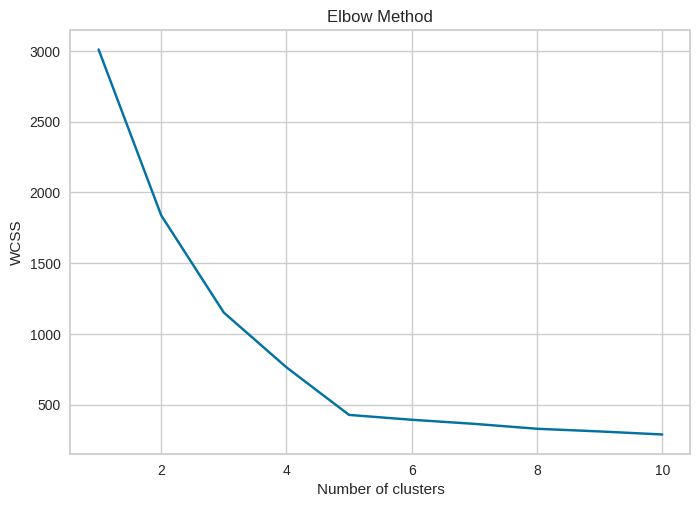

In [ ]:
# Using data normalized by MinMaxScaler
wcss = []
for i in range(1, 11):
    kmeans = KMeans(n_clusters=i,random_state=0)
    kmeans.fit(scaler1_df)
    wcss.append(kmeans.inertia_)

plt.plot(range(1, 11), wcss)
plt.title('Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')
plt.show()

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:8

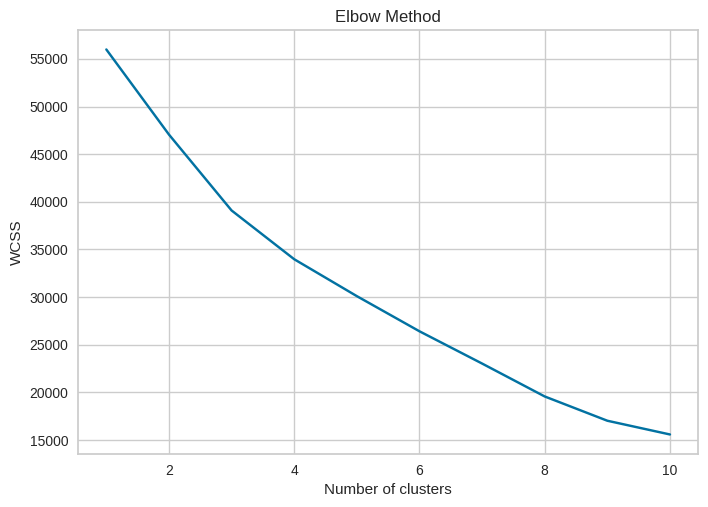

In [ ]:
# Using data normalized by StandardScaler
wcss = []
for i in range(1, 11):
    kmeans = KMeans(n_clusters=i,random_state=0)
    kmeans.fit(scaler2_df)
    wcss.append(kmeans.inertia_)

plt.plot(range(1, 11), wcss)
plt.title('Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')
plt.show()

In [ ]:
#Build Cluster algorithm


# Using data normalized by MinMaxScaler
clusters_new1 = KMeans(5, random_state=42)
clusters_new1.fit(scaler1_df)

sil_score= silhouette_score(scaler1_df, clusters_new1.labels_)
print('Silhouette Score for data normalized by MinMaxScaler: ',sil_score)

# Using data normalized by StandardScaler
clusters_new2 = KMeans(5, random_state=42)
clusters_new2.fit(scaler2_df)

sil_score= silhouette_score(scaler2_df, clusters_new2.labels_)
print('Silhouette Score for data normalized by StandardScaler: ',sil_score)

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


Silhouette Score for data normalized by MinMaxScaler:  0.6546771453385097


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


Silhouette Score for data normalized by StandardScaler:  0.38334474076438807


In [ ]:
#Assign clusters to the data set
data['clusterid_Kmeans'] = clusters_new1.labels_
data1['clusterid_Kmeans'] = clusters_new1.labels_

In [ ]:
y=pd.DataFrame(clusters_new1.fit_predict(scaler1_df),columns=['clusterid_Kmeans'])
y['clusterid_Kmeans'].value_counts()

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


1    1019
2     879
3     804
0     677
4     620
Name: clusterid_Kmeans, dtype: int64

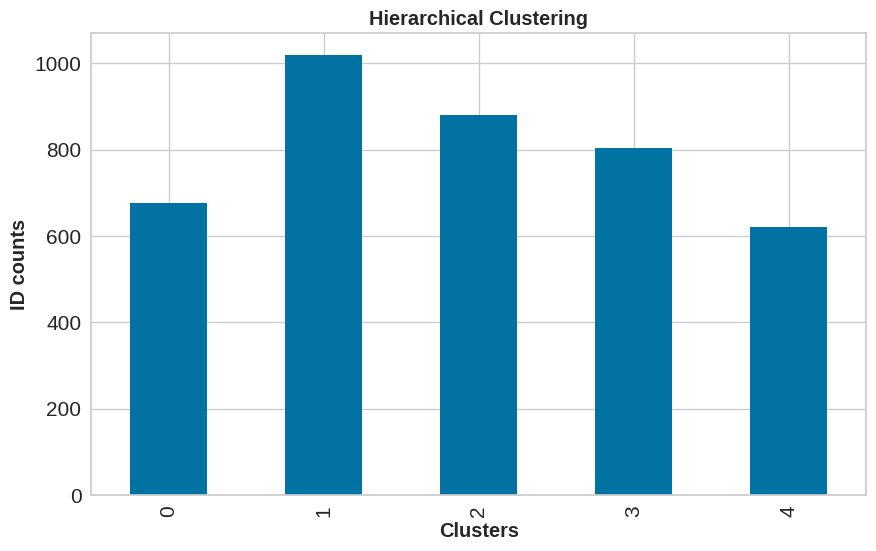

In [ ]:
# Plotting barplot using groupby method to get visualization of how many row no. in each cluster

fig, ax = plt.subplots(figsize=(10, 6))
data.groupby(['clusterid_Kmeans']).count()['ID'].plot(kind='bar')
plt.ylabel('ID Counts')
plt.title('Hierarchical Clustering',fontsize='large',fontweight='bold')
ax.set_xlabel('Clusters', fontsize='large', fontweight='bold')
ax.set_ylabel('ID counts', fontsize='large', fontweight='bold')
plt.yticks(fontsize=15)
plt.xticks(fontsize=15)
plt.show()

In [ ]:
data1.groupby('clusterid_Kmeans').agg(['mean']).reset_index()

,clusterid_Kmeans,Balance,Qual_miles,cc1_miles,cc2_miles,cc3_miles,Bonus_miles,Bonus_trans,Flight_miles_12mo,Flight_trans_12,Days_since_enroll,Award,clustersid_s1,clustersid_s2
,,mean,mean,mean,mean,mean,mean,mean,mean,mean,mean,mean,mean,mean
0,0,84677.073855,291.106352,1.169867,1.033973,1.002954,8851.610044,10.614476,1071.774003,3.243722,4347.319055,1.0,2.995569,1.215657
1,1,32923.230618,89.028459,1.066732,1.007851,1.003925,3091.382728,6.002944,212.278705,0.599607,1984.263984,0.0,1.986261,2.943081
2,2,51016.219568,77.147895,1.136519,1.029579,1.020478,3971.822526,7.092150,243.968146,0.728100,5538.655290,0.0,0.000000,1.010239
3,3,107474.116915,197.328358,3.917910,1.000000,1.031095,45791.516169,20.134328,677.074627,2.057214,4858.932836,1.0,0.997512,2.085821
4,4,116458.243548,100.080645,3.561290,1.001613,1.000000,30825.758065,17.211290,224.264516,0.632258,4403.159677,0.0,4.000000,1.990323


#DBSCAN

In [ ]:
from sklearn.cluster import DBSCAN


In [ ]:
# Normalizing data using MinMaxScaler
scaler1_df = scaler1.fit_transform(data1)
print(scaler1_df)

[[0.01650773 0.         0.         ... 0.         0.25       0.5       ]
 [0.01128788 0.         0.         ... 0.         0.25       0.5       ]
 [0.02425685 0.         0.         ... 0.         0.25       0.5       ]
 ...
 [0.0431695  0.         0.5        ... 0.25       0.5        0.75      ]
 [0.03220189 0.         0.         ... 0.5        0.75       0.25      ]
 [0.00176908 0.         0.         ... 0.5        0.75       0.25      ]]


In [ ]:
# Using data normalized by MinMaxScaler
dbscan = DBSCAN(eps=1, min_samples=12)
dbscan.fit(scaler1_df)

DBSCAN(eps=1, min_samples=12)

In [ ]:
dbscan.labels_

array([0, 0, 0, ..., 1, 0, 0])

In [ ]:
y=pd.DataFrame(dbscan.fit_predict(scaler1_df),columns=['clusterid_DBSCAN'])
y['clusterid_DBSCAN'].value_counts()

0    2518
1    1481
Name: clusterid_DBSCAN, dtype: int64

In [ ]:
# silhouette score
sil_score= silhouette_score(scaler1_df, dbscan.labels_)
sil_score

0.4002000562480367

In [ ]:
# for epsilon = 0.8
dbscan1 = DBSCAN(eps=0.8, min_samples=12)
dbscan1.fit(scaler1_df)

y=pd.DataFrame(dbscan1.fit_predict(scaler1_df),columns=['clusterid_DBSCAN'])
print(y['clusterid_DBSCAN'].value_counts())

# silhouette score
sil_score= silhouette_score(scaler1_df, dbscan1.labels_)
print('silhouette score: ',sil_score)

 0    1897
 1     803
 3     676
 2     620
-1       3
Name: clusterid_DBSCAN, dtype: int64
silhouette score:  0.5894174665148995


In [ ]:
# for epsilon = 0.6
dbscan2 = DBSCAN(eps=0.6, min_samples=12)
dbscan2.fit(scaler1_df)

y=pd.DataFrame(dbscan2.fit_predict(scaler1_df),columns=['clusterid_DBSCAN'])
print(y['clusterid_DBSCAN'].value_counts())

# silhouette score
sil_score= silhouette_score(scaler1_df, dbscan2.labels_)
print('silhouette score: ',sil_score)

 0    1878
 1     794
 3     622
 2     619
 5      51
-1      23
 4      12
Name: clusterid_DBSCAN, dtype: int64
silhouette score:  0.4766322487545161


In [ ]:
# for epsilon = 0.5
dbscan3 = DBSCAN(eps=0.5, min_samples=12)
dbscan3.fit(scaler1_df)

y=pd.DataFrame(dbscan3.fit_predict(scaler1_df),columns=['clusterid_DBSCAN'])
print(y['clusterid_DBSCAN'].value_counts())

# silhouette score
sil_score= silhouette_score(scaler1_df, dbscan3.labels_)
print('silhouette score: ',sil_score)

 8    993
 0    841
 1    748
 2    614
 3    604
-1     59
 5     50
 4     43
 9     19
 6     16
 7     12
Name: clusterid_DBSCAN, dtype: int64
silhouette score:  0.5949559269799103


In [ ]:
# for epsilon = 0.55
dbscan4 = DBSCAN(eps=0.55, min_samples=12)
dbscan4.fit(scaler1_df)

y=pd.DataFrame(dbscan4.fit_predict(scaler1_df),columns=['clusterid_DBSCAN'])
print(y['clusterid_DBSCAN'].value_counts())

# silhouette score
sil_score= silhouette_score(scaler1_df, dbscan4.labels_)
print('silhouette score: ',sil_score)

 7    1012
 0     841
 1     792
 2     618
 3     605
 5      51
-1      31
 6      25
 4      12
 8      12
Name: clusterid_DBSCAN, dtype: int64
silhouette score:  0.6407297749289276


In [ ]:
data['clusterid_DBSCAN'] = dbscan4.labels_
data1['clusterid_DBSCAN'] = dbscan4.labels_

In [ ]:
data.head()

,ID,Balance,Qual_miles,cc1_miles,cc2_miles,cc3_miles,Bonus_miles,Bonus_trans,Flight_miles_12mo,Flight_trans_12,Days_since_enroll,Award,clustersid_s1,clustersid_s2,clusterid_Kmeans,clusterid_DBSCAN
0,1,28143,0,1,1,1,174,1,0,0,7000,0,0,1,2,0
1,2,19244,0,1,1,1,215,2,0,0,6968,0,0,1,2,0
2,3,41354,0,1,1,1,4123,4,0,0,7034,0,0,1,2,0
3,4,14776,0,1,1,1,500,1,0,0,6952,0,0,1,2,0
4,5,97752,0,4,1,1,43300,26,2077,4,6935,1,1,2,3,1


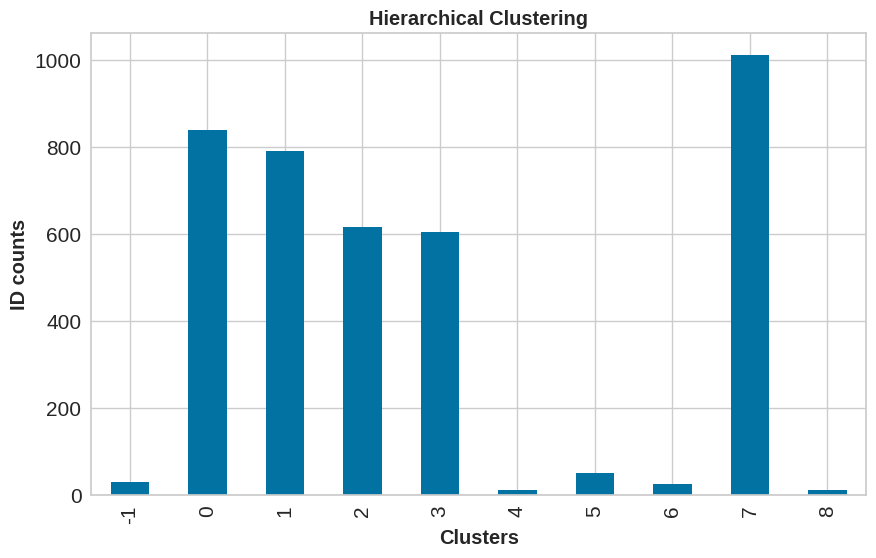

In [ ]:
# Plotting barplot using groupby method to get visualization of how many row no. in each cluster

fig, ax = plt.subplots(figsize=(10, 6))
data.groupby(['clusterid_DBSCAN']).count()['ID'].plot(kind='bar')
plt.ylabel('ID Counts')
plt.title('Hierarchical Clustering',fontsize='large',fontweight='bold')
ax.set_xlabel('Clusters', fontsize='large', fontweight='bold')
ax.set_ylabel('ID counts', fontsize='large', fontweight='bold')
plt.yticks(fontsize=15)
plt.xticks(fontsize=15)
plt.show()

In [ ]:
data1.groupby('clusterid_DBSCAN').agg(['mean']).reset_index()

,clusterid_DBSCAN,Balance,Qual_miles,cc1_miles,cc2_miles,cc3_miles,Bonus_miles,Bonus_trans,Flight_miles_12mo,Flight_trans_12,Days_since_enroll,Award,clustersid_s1,clustersid_s2,clusterid_Kmeans
,,mean,mean,mean,mean,mean,mean,mean,mean,mean,mean,mean,mean,mean,mean
0,-1,172898.419355,448.225806,3.000000,1.322581,2.548387,73153.516129,32.129032,3429.870968,9.645161,4273.935484,0.677419,1.354839,0.806452,1.903226
1,0,49348.089180,79.332937,1.122473,1.000000,1.001189,3264.662307,6.625446,171.694411,0.525565,5588.445898,0.000000,0.000000,0.998811,2.000000
2,1,107979.741162,187.422980,3.914141,1.000000,1.000000,44995.869949,19.885101,630.325758,1.924242,4864.160354,1.000000,1.000000,2.101010,3.000000
3,2,116454.540453,98.786408,3.561489,1.000000,1.000000,30777.100324,17.186084,212.087379,0.603560,4409.106796,0.000000,4.000000,1.990291,4.000000
4,3,78040.444628,282.042975,1.163636,1.000000,1.000000,7365.575207,8.819835,567.661157,1.836364,4328.727273,1.000000,3.000000,1.009917,0.000000
5,4,78456.916667,91.166667,1.000000,1.000000,1.000000,6927.250000,17.250000,5325.250000,14.833333,4874.666667,0.000000,0.000000,4.000000,2.000000
6,5,124061.666667,465.901961,1.254902,1.000000,1.000000,17851.921569,25.607843,6319.431373,17.980392,4456.705882,1.000000,3.000000,4.000000,0.000000
7,6,43494.400000,0.000000,1.000000,2.360000,1.000000,11483.320000,13.800000,150.000000,0.600000,3544.400000,0.000000,0.000000,0.000000,1.760000
8,7,32918.780632,89.644269,1.067194,1.000000,1.000000,2965.573123,5.958498,213.351779,0.600791,1988.869565,0.000000,2.000000,2.963439,1.000000
